In [3]:
import os
import xarray as xr
import glob
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
from PIL import Image

In [4]:
# Define the output directory and change to that directory
output_directory = '/glade/work/srathod/F2000_126months_CESM2.1.5_USAvarying_output'
os.chdir(output_directory)

# Load the datasets
h2_1970_files = sorted(glob.glob('*1970USA_2000ROW.cam.h2*'))
h2_2010_files = sorted(glob.glob('*2010USA_2000ROW.cam.h2*'))

Jan_CDNUMC_1970 = xr.open_dataset(h2_1970_files[0])['CDNUMC'].squeeze()
July_CDNUMC_1970 = xr.open_dataset(h2_1970_files[6])['CDNUMC'].squeeze()
Jan_CDNUMC_2010 = xr.open_dataset(h2_2010_files[0])['CDNUMC'].squeeze()
July_CDNUMC_2010 = xr.open_dataset(h2_2010_files[6])['CDNUMC'].squeeze()

# Get the data values
Jan_1970_data = Jan_CDNUMC_1970.values
July_1970_data = July_CDNUMC_1970.values
Jan_2010_data = Jan_CDNUMC_2010.values
July_2010_data = July_CDNUMC_2010.values

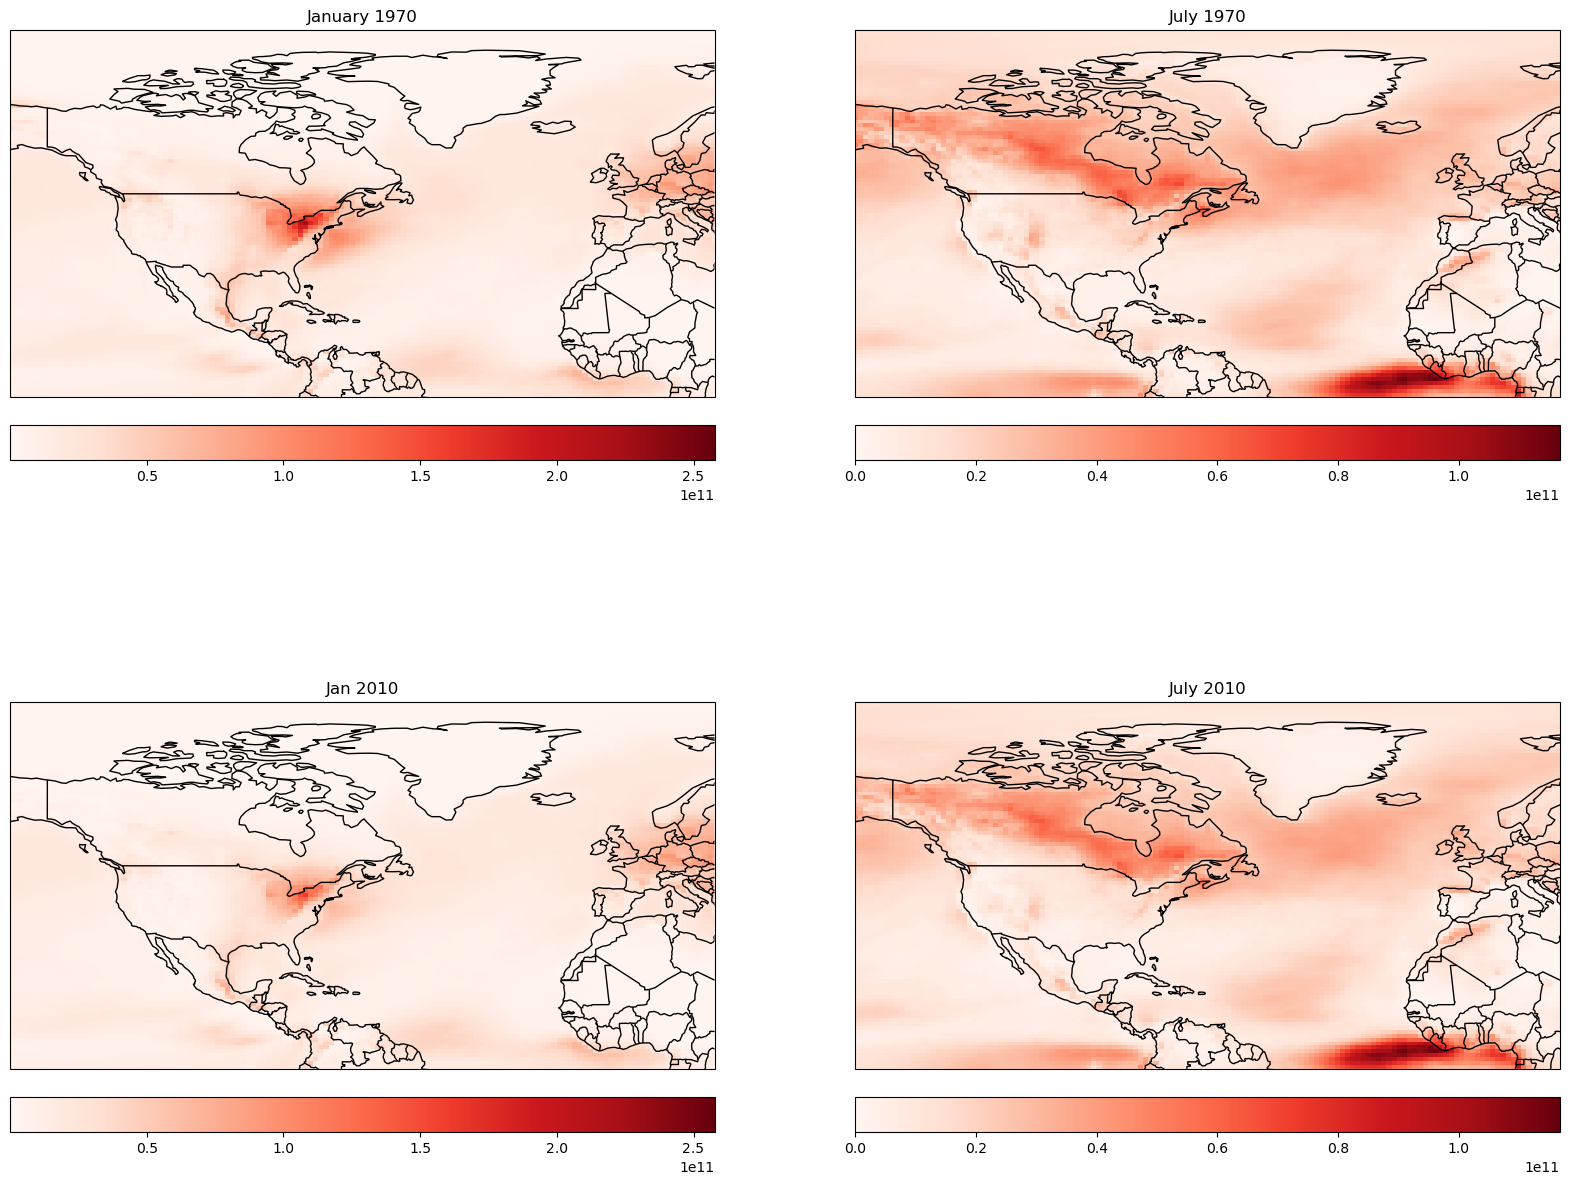

In [5]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 16), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot for January difference
ax = axs[0,0]
mappable1 = ax.pcolormesh(Jan_CDNUMC_1970.lon, Jan_CDNUMC_1970.lat, Jan_CDNUMC_1970, cmap='Reds')
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_extent([-150, 20, 0, 75])
ax.set_title('January 1970')
plt.colorbar(mappable1, orientation='horizontal', pad=0.05)

# Plot for July difference
ax = axs[0,1]
mappable2 = ax.pcolormesh(Jan_CDNUMC_1970.lon, Jan_CDNUMC_1970.lat, July_CDNUMC_1970, cmap='Reds')
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_extent([-150, 20, 0, 75])
ax.set_title('July 1970')
plt.colorbar(mappable2, orientation='horizontal', pad=0.05)

ax = axs[1,0]
mappable3 = ax.pcolormesh(Jan_CDNUMC_2010.lon, Jan_CDNUMC_2010.lat, Jan_CDNUMC_2010, cmap='Reds')
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_extent([-150, 20, 0, 75])
ax.set_title('Jan 2010')
plt.colorbar(mappable3, orientation='horizontal', pad=0.05)

ax = axs[1,1]
mappable4 = ax.pcolormesh(July_CDNUMC_2010.lon, July_CDNUMC_2010.lat, July_CDNUMC_2010, cmap='Reds')
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_extent([-150, 20, 0, 75])
ax.set_title('July 2010')
plt.colorbar(mappable4, orientation='horizontal', pad=0.05)

# Display the plot
plt.show()

In [7]:
# Compute differences
Jan_diff = Jan_CDNUMC_1970 - Jan_CDNUMC_2010
July_diff = July_CDNUMC_1970 - July_CDNUMC_2010

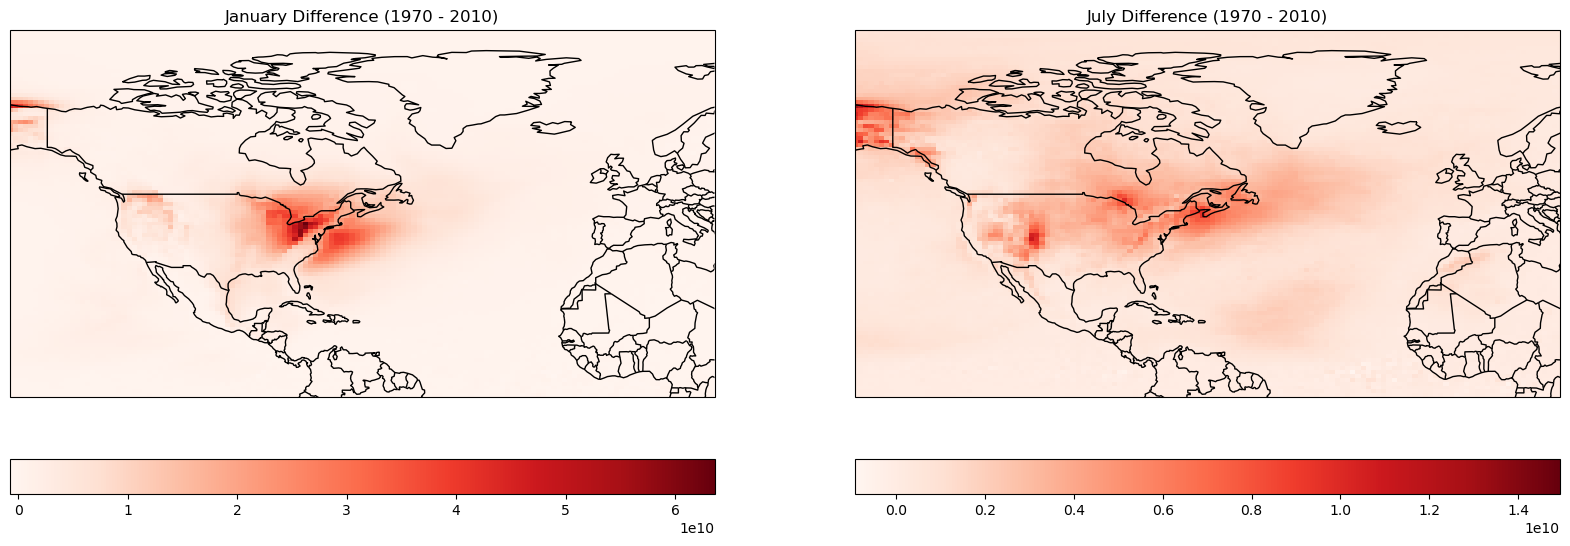

In [8]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 16), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot for January difference
ax = axs[0]
mappable = ax.pcolormesh(Jan_CDNUMC_1970.lon, Jan_CDNUMC_1970.lat, Jan_diff, cmap='Reds')
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_extent([-150, 20, 0, 75])
ax.set_title('January Difference (1970 - 2010)')
plt.colorbar(mappable, orientation='horizontal', pad=0.05)

# Plot for July difference
ax = axs[1]
mappable = ax.pcolormesh(Jan_CDNUMC_1970.lon, Jan_CDNUMC_1970.lat, July_diff, cmap='Reds')
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_extent([-150, 20, 0, 75])
ax.set_title('July Difference (1970 - 2010)')
plt.colorbar(mappable, orientation='horizontal', pad=0.05)

# Add a single colorbar for both plots
#cbar = fig.colorbar(mappable, ax = axs, orientation='horizontal', pad=0.05, aspect=50)
#cbar.set_label('Difference in Cloud Droplet Number Concentration (/m^2)', fontsize=14)

# Display the plot
plt.show()